In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [3]:
# IMDBデータセットのダウンロード
NUM_WORDS=10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # 形状が(len(sequences), dimension)ですべて0の行列を作る
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0 # 特定のインデックスに対してresults[i]を1に設定する
    return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

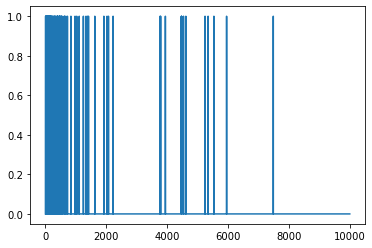

In [4]:
plt.plot(train_data[0])

In [6]:
#　過学習のデモ
# 比較基準を作る
baseline_model = keras.Sequential([
    # `.summary`を見るために`input_shape`が必要
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                                          loss='binary_crossentropy',
                                          metrics=['accuracy', 'binary_crossentropy'])
baseline_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                160016    
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [7]:
baseline_history = baseline_model.fit(train_data,
                                                                 train_labels,
                                                                 epochs=20,
                                                                 batch_size=512,
                                                                 validation_data=(test_data, test_labels),
                                                                 verbose=2)

Epoch 1/20


2022-06-02 18:58:30.134130: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


49/49 - 2s - loss: 0.5533 - accuracy: 0.7255 - binary_crossentropy: 0.5533 - val_loss: 0.3938 - val_accuracy: 0.8746 - val_binary_crossentropy: 0.3938 - 2s/epoch - 42ms/step
Epoch 2/20
49/49 - 1s - loss: 0.2885 - accuracy: 0.9080 - binary_crossentropy: 0.2885 - val_loss: 0.2903 - val_accuracy: 0.8887 - val_binary_crossentropy: 0.2903 - 585ms/epoch - 12ms/step
Epoch 3/20
49/49 - 0s - loss: 0.2021 - accuracy: 0.9314 - binary_crossentropy: 0.2021 - val_loss: 0.2889 - val_accuracy: 0.8840 - val_binary_crossentropy: 0.2889 - 425ms/epoch - 9ms/step
Epoch 4/20
49/49 - 1s - loss: 0.1606 - accuracy: 0.9451 - binary_crossentropy: 0.1606 - val_loss: 0.2994 - val_accuracy: 0.8818 - val_binary_crossentropy: 0.2994 - 648ms/epoch - 13ms/step
Epoch 5/20
49/49 - 1s - loss: 0.1335 - accuracy: 0.9564 - binary_crossentropy: 0.1335 - val_loss: 0.3195 - val_accuracy: 0.8773 - val_binary_crossentropy: 0.3195 - 600ms/epoch - 12ms/step
Epoch 6/20
49/49 - 1s - loss: 0.1125 - accuracy: 0.9643 - binary_crossentro

In [20]:
# より小さいモデルの構築
# 隠れユニット数が少ないモデル
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                                         loss='binary_crossentropy',
                                         metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 4)                 40004     
                                                                 
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 dense_14 (Dense)            (None, 1)                 5         
                                                                 
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [21]:
smaller_history = smaller_model.fit(train_data,
                                                               train_labels,
                                                               epochs=20,
                                                               batch_size=512,
                                                               validation_data=(test_data, test_labels),
                                                               verbose=2)

Epoch 1/20
49/49 - 2s - loss: 0.6296 - accuracy: 0.6150 - binary_crossentropy: 0.6296 - val_loss: 0.5755 - val_accuracy: 0.7224 - val_binary_crossentropy: 0.5755 - 2s/epoch - 42ms/step
Epoch 2/20
49/49 - 1s - loss: 0.5223 - accuracy: 0.8038 - binary_crossentropy: 0.5223 - val_loss: 0.5047 - val_accuracy: 0.8148 - val_binary_crossentropy: 0.5047 - 525ms/epoch - 11ms/step
Epoch 3/20
49/49 - 0s - loss: 0.4516 - accuracy: 0.8741 - binary_crossentropy: 0.4516 - val_loss: 0.4570 - val_accuracy: 0.8529 - val_binary_crossentropy: 0.4570 - 369ms/epoch - 8ms/step
Epoch 4/20
49/49 - 0s - loss: 0.3901 - accuracy: 0.9108 - binary_crossentropy: 0.3901 - val_loss: 0.4030 - val_accuracy: 0.8779 - val_binary_crossentropy: 0.4030 - 355ms/epoch - 7ms/step
Epoch 5/20
49/49 - 0s - loss: 0.2947 - accuracy: 0.9336 - binary_crossentropy: 0.2947 - val_loss: 0.3141 - val_accuracy: 0.8858 - val_binary_crossentropy: 0.3141 - 361ms/epoch - 7ms/step
Epoch 6/20
49/49 - 0s - loss: 0.2017 - accuracy: 0.9412 - binary_c

In [10]:
# より大きなモデルの構築
# どこからか学習がおおるのかを見る
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                                        loss='binary_crossentropy',
                                        metrics=['accuracy', 'binary_crossentropy'])
bigger_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 512)               5120512   
                                                                 
 dense_10 (Dense)            (None, 512)               262656    
                                                                 
 dense_11 (Dense)            (None, 1)                 513       
                                                                 
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [11]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                                             epochs=20,
                                                             batch_size=512,
                                                             validation_data=(test_data, test_labels),
                                                             verbose=2)

Epoch 1/20
49/49 - 7s - loss: 0.3444 - accuracy: 0.8496 - binary_crossentropy: 0.3444 - val_loss: 0.2920 - val_accuracy: 0.8815 - val_binary_crossentropy: 0.2920 - 7s/epoch - 147ms/step
Epoch 2/20
49/49 - 6s - loss: 0.1368 - accuracy: 0.9504 - binary_crossentropy: 0.1368 - val_loss: 0.3292 - val_accuracy: 0.8721 - val_binary_crossentropy: 0.3292 - 6s/epoch - 114ms/step
Epoch 3/20
49/49 - 5s - loss: 0.0428 - accuracy: 0.9873 - binary_crossentropy: 0.0428 - val_loss: 0.4490 - val_accuracy: 0.8716 - val_binary_crossentropy: 0.4490 - 5s/epoch - 109ms/step
Epoch 4/20
49/49 - 5s - loss: 0.0057 - accuracy: 0.9990 - binary_crossentropy: 0.0057 - val_loss: 0.5912 - val_accuracy: 0.8691 - val_binary_crossentropy: 0.5912 - 5s/epoch - 110ms/step
Epoch 5/20
49/49 - 6s - loss: 8.0654e-04 - accuracy: 1.0000 - binary_crossentropy: 8.0654e-04 - val_loss: 0.6849 - val_accuracy: 0.8704 - val_binary_crossentropy: 0.6849 - 6s/epoch - 115ms/step
Epoch 6/20
49/49 - 5s - loss: 7.2891e-04 - accuracy: 1.0000 - 

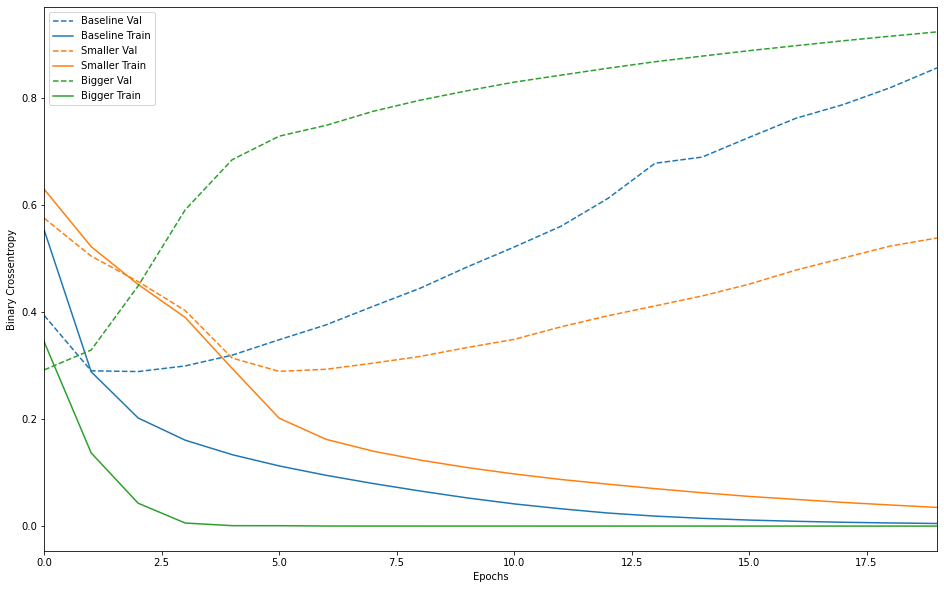

In [22]:
# 訓練時と検証時の損失をグラフにする
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                              '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(), label=name.title() + ' Train')
        
        plt.xlabel('Epochs')
        plt.ylabel(key.replace('_', ' ').title())
        plt.legend()
        
        plt.xlim([0, max(history.epoch)])
        
plot_history([('baseline', baseline_history),
                         ('smaller', smaller_history),
                         ('bigger', bigger_history)])

In [23]:
# 過学習防止の戦略
# 重みの正則化を加える
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                                loss='binary_crossentropy',
                                metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Epoch 1/20
49/49 - 2s - loss: 0.5174 - accuracy: 0.8084 - binary_crossentropy: 0.4766 - val_loss: 0.3792 - val_accuracy: 0.8790 - val_binary_crossentropy: 0.3367 - 2s/epoch - 48ms/step
Epoch 2/20
49/49 - 1s - loss: 0.3005 - accuracy: 0.9102 - binary_crossentropy: 0.2542 - val_loss: 0.3364 - val_accuracy: 0.8873 - val_binary_crossentropy: 0.2871 - 677ms/epoch - 14ms/step
Epoch 3/20
49/49 - 1s - loss: 0.2516 - accuracy: 0.9298 - binary_crossentropy: 0.2000 - val_loss: 0.3381 - val_accuracy: 0.8862 - val_binary_crossentropy: 0.2847 - 709ms/epoch - 14ms/step
Epoch 4/20
49/49 - 1s - loss: 0.2285 - accuracy: 0.9403 - binary_crossentropy: 0.1736 - val_loss: 0.3479 - val_accuracy: 0.8820 - val_binary_crossentropy: 0.2918 - 654ms/epoch - 13ms/step
Epoch 5/20
49/49 - 1s - loss: 0.2140 - accuracy: 0.9472 - binary_crossentropy: 0.1565 - val_loss: 0.3647 - val_accuracy: 0.8780 - val_binary_crossentropy: 0.3063 - 660ms/epoch - 13ms/step
Epoch 6/20
49/49 - 1s - loss: 0.2031 - accuracy: 0.9520 - binar

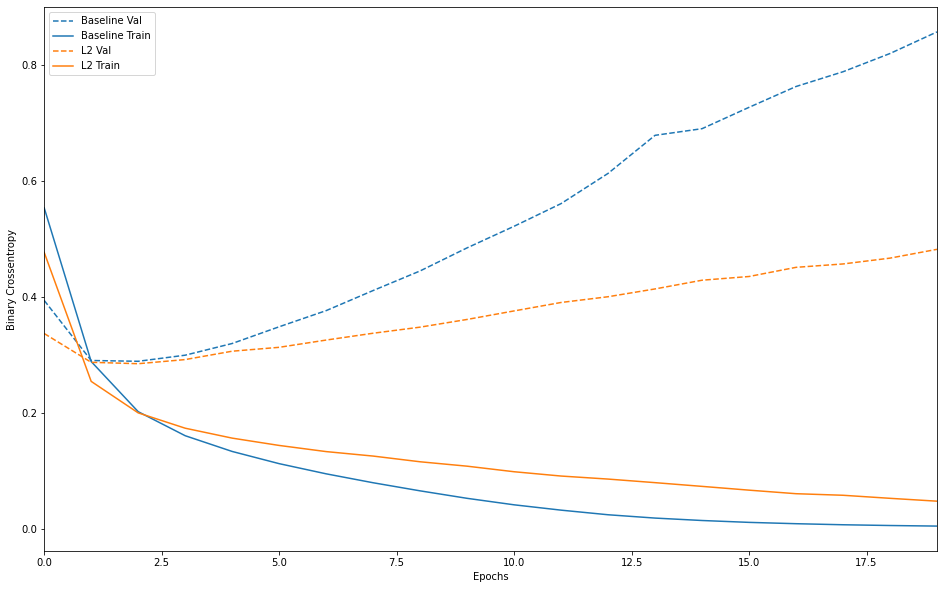

In [24]:
plot_history([('baseline', baseline_history),
                         ('l2', l2_model_history)])

In [26]:
# ドロップアウトを追加する
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 2s - loss: 0.6096 - accuracy: 0.6691 - binary_crossentropy: 0.6096 - val_loss: 0.4680 - val_accuracy: 0.8559 - val_binary_crossentropy: 0.4680 - 2s/epoch - 42ms/step
Epoch 2/20
49/49 - 1s - loss: 0.4424 - accuracy: 0.8228 - binary_crossentropy: 0.4424 - val_loss: 0.3324 - val_accuracy: 0.8823 - val_binary_crossentropy: 0.3324 - 610ms/epoch - 12ms/step
Epoch 3/20
49/49 - 0s - loss: 0.3379 - accuracy: 0.8752 - binary_crossentropy: 0.3379 - val_loss: 0.2888 - val_accuracy: 0.8870 - val_binary_crossentropy: 0.2888 - 443ms/epoch - 9ms/step
Epoch 4/20
49/49 - 1s - loss: 0.2762 - accuracy: 0.9036 - binary_crossentropy: 0.2762 - val_loss: 0.2756 - val_accuracy: 0.8876 - val_binary_crossentropy: 0.2756 - 593ms/epoch - 12ms/step
Epoch 5/20
49/49 - 1s - loss: 0.2356 - accuracy: 0.9213 - binary_crossentropy: 0.2356 - val_loss: 0.2884 - val_accuracy: 0.8856 - val_binary_crossentropy: 0.2884 - 535ms/epoch - 11ms/step
Epoch 6/20
49/49 - 1s - loss: 0.2097 - accuracy: 0.9295 - binary

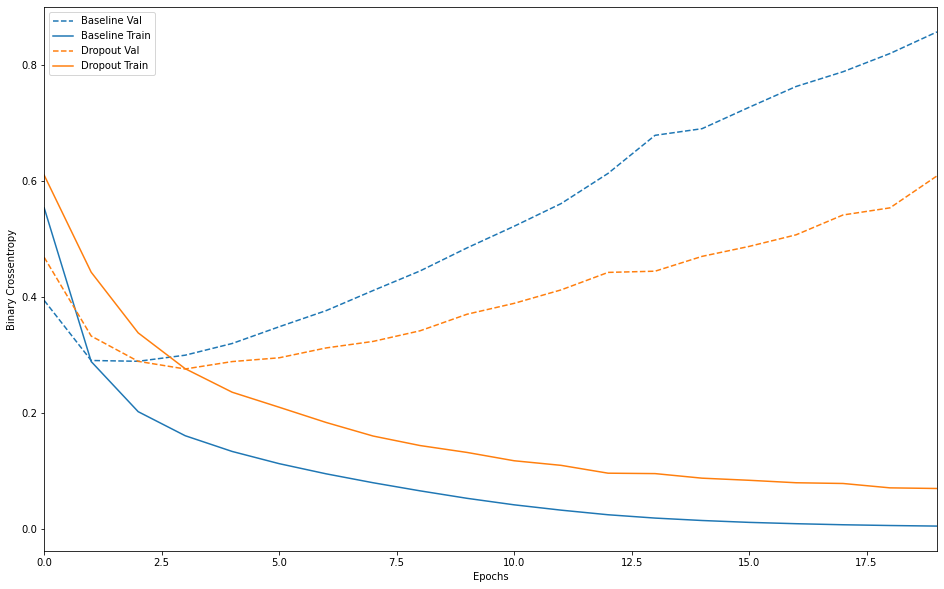

In [27]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])